## Pyfesom2 Overview

Pyfesom2 is python model for working with FESOM2 data. The FESOM2 is different from other ocean models by supporting unstructured triangular meshes of variable resolution. 


<img src="../images/fig_geometry.png" width="500">



The mesh is defined as a collection of points (vertices, or nodes) shown as blue dots, and connections between this points. More details about the geometry: https://fesom2.readthedocs.io/en/latest/geometry.html and mesh itself: https://fesom2.readthedocs.io/en/latest/meshes/meshes.html 

## Download and installation

### pyfesom2

GitHub: https://github.com/FESOM/pyfesom2

Installation instructions: https://github.com/FESOM/pyfesom2/blob/master/README.md

### Data and mesh

If you would like to try to repeat examples from this introduction, you can download FESOM2 data and mesh. The data are quite heavy, about 1.5Gb in bzip2 archive.

Link: https://swiftbrowser.dkrz.de/public/dkrz_c719fbc3-98ea-446c-8e01-356dac22ed90/PYFESOM2/

You have to download `LCORE2.tar` and `core2.tar.bz2` archives and extract them.


Alternative would be to use very light weight mesh that comes with pyfesom2 in the `tests/data/pi-grid/` and example data on this mesh in `tests/data/pi-results`.

I will use examples from 4.5km arctic simulations

## pyfesom2 basic functionality

In [12]:
import pyfesom2 as pf
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import xarray as xr
import os

In [82]:
mesh = pf.load_mesh('/work/ollie/clidyn/FESOM2/meshes/farc/')
datapath = "/work/ollie/nkolduno/farc_2.1_default_TKE_Hice/"

/work/ollie/clidyn/FESOM2/meshes/farc/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/clidyn/FESOM2/meshes/farc/pickle_mesh_py3_fesom2


In [83]:
mesh


FESOM mesh:
path                  = /work/ollie/clidyn/FESOM2/meshes/farc
alpha, beta, gamma    = 0, 0, 0
number of 2d nodes    = 638387
number of 2d elements = 1253306

        

Three main things you need in the mesh object are:

In [84]:
mesh.x2

array([140.1052, 140.5437, 140.987 , ..., 137.7703, 139.1579, 139.6963])

In [85]:
mesh.y2

array([-66.8372, -66.8376, -66.8438, ..., -66.5082, -66.734 , -66.7394])

In [86]:
mesh.elem

array([[     0,      1,     64],
       [     0,     64, 638386],
       [     1,      2,     60],
       ...,
       [638376, 638380, 638378],
       [638377, 638378, 638381],
       [638378, 638380, 638381]])

In [87]:
mesh.x2[mesh.elem]

array([[140.1052, 140.5437, 140.2462],
       [140.1052, 140.2462, 139.6963],
       [140.5437, 140.987 , 140.7482],
       ...,
       [136.916 , 137.3857, 136.8424],
       [136.7837, 136.8424, 137.2482],
       [136.8424, 137.3857, 137.2482]])

### getting the data

In [88]:
data = xr.open_dataset(os.path.join(datapath,"temp.fesom.2000.nc"))

In [89]:
data

<xarray.Dataset>
Dimensions:  (nod2: 638387, nz1: 47, time: 1)
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time     (time) datetime64[ns] 2000-12-31T23:50:00
Dimensions without coordinates: nod2
Data variables:
    temp     (time, nod2, nz1) float32 ...
Attributes:
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       5d102e7
    FESOM_MeshPath:                      /work/ollie/clidyn/FESOM2/meshes/farc/
    FESOM_mesh_representative_checksum:  e11cc0f328d5381cfc6d9dbb94c5d6a4
    FESOM_ClimateDataPath:               /work/ollie/clidyn/FESOM2/hydrograph...
    FESOM_which_ALE:                     zstar
    FESOM_mix_scheme:                    cvmix_TKE+cvmix_IDEMIX
    FESOM_tra_adv_hor:                   MFCT
    FESOM_tra_adv_ver:                   QR4C
    FESOM_tra_adv_lim:                   FCT
    FESOM_use_partial_cell:              -1
    FESOM_force_rotation:                -1
    FESOM_include_fleapyear:             -1
    FESOM_use_floatice:                  0
    FESOM_whichEVP:                      0
    FESOM_evp_rheol_steps:               120
    FESOM_visc_option:                   7
    FESOM_w_split:                       -1

In [90]:
data = xr.open_mfdataset(os.path.join(datapath,"temp.fesom.*.nc"))

In [91]:
data

<xarray.Dataset>
Dimensions:  (nod2: 638387, nz1: 47, time: 62)
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time     (time) datetime64[ns] 1958-12-31T23:50:00 ... 2019-12-31T23:50:00
Dimensions without coordinates: nod2
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 638387, 47), meta=np.ndarray>
Attributes:
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       5d102e7
    FESOM_MeshPath:                      /work/ollie/clidyn/FESOM2/meshes/farc/
    FESOM_mesh_representative_checksum:  e11cc0f328d5381cfc6d9dbb94c5d6a4
    FESOM_ClimateDataPath:               /work/ollie/clidyn/FESOM2/hydrograph...
    FESOM_which_ALE:                     zstar
    FESOM_mix_scheme:                    cvmix_TKE+cvmix_IDEMIX
    FESOM_tra_adv_hor:                   MFCT
    FESOM_tra_adv_ver:                   QR4C
    FESOM_tra_adv_lim:                   FCT
    FESOM_use_partial_cell:              -1
    FESOM_force_rotation:                -1
    FESOM_include_fleapyear:             -1
    FESOM_use_floatice:                  0
    FESOM_whichEVP:                      0
    FESOM_evp_rheol_steps:               120
    FESOM_visc_option:                   7
    FESOM_w_split:                       -1

[Xarray documentation](http://xarray.pydata.org/en/stable/)

[Short introduction from myself](https://github.com/koldunovn/python_data_train/blob/main/notebooks/09_xarray.ipynb)

In [92]:
data.sel(time=slice('2000','2005'))

<xarray.Dataset>
Dimensions:  (nod2: 638387, nz1: 47, time: 6)
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time     (time) datetime64[ns] 2000-12-31T23:50:00 ... 2005-12-31T23:50:00
Dimensions without coordinates: nod2
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 638387, 47), meta=np.ndarray>
Attributes:
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       5d102e7
    FESOM_MeshPath:                      /work/ollie/clidyn/FESOM2/meshes/farc/
    FESOM_mesh_representative_checksum:  e11cc0f328d5381cfc6d9dbb94c5d6a4
    FESOM_ClimateDataPath:               /work/ollie/clidyn/FESOM2/hydrograph...
    FESOM_which_ALE:                     zstar
    FESOM_mix_scheme:                    cvmix_TKE+cvmix_IDEMIX
    FESOM_tra_adv_hor:                   MFCT
    FESOM_tra_adv_ver:                   QR4C
    FESOM_tra_adv_lim:                   FCT
    FESOM_use_partial_cell:              -1
    FESOM_force_rotation:                -1
    FESOM_include_fleapyear:             -1
    FESOM_use_floatice:                  0
    FESOM_whichEVP:                      0
    FESOM_evp_rheol_steps:               120
    FESOM_visc_option:                   7
    FESOM_w_split:                       -1

In [93]:
data.temp[20:30,:,:]

<xarray.DataArray 'temp' (time: 10, nod2: 638387, nz1: 47)>
dask.array<getitem, shape=(10, 638387, 47), dtype=float32, chunksize=(1, 638387, 47), chunktype=numpy.ndarray>
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time     (time) datetime64[ns] 1978-12-31T23:50:00 ... 1987-12-31T23:50:00
Dimensions without coordinates: nod2
Attributes:
    description:  temperature
    long_name:    temperature
    units:        C

In [94]:
data.temp[20:30,:,0]

<xarray.DataArray 'temp' (time: 10, nod2: 638387)>
dask.array<getitem, shape=(10, 638387), dtype=float32, chunksize=(1, 638387), chunktype=numpy.ndarray>
Coordinates:
    nz1      float64 2.5
  * time     (time) datetime64[ns] 1978-12-31T23:50:00 ... 1987-12-31T23:50:00
Dimensions without coordinates: nod2
Attributes:
    description:  temperature
    long_name:    temperature
    units:        C

In [95]:
data_mean = data.sel(time=slice('2000','2005')).mean(dim='time').compute()

In [96]:
data_mean

<xarray.Dataset>
Dimensions:  (nod2: 638387, nz1: 47)
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
Dimensions without coordinates: nod2
Data variables:
    temp     (nod2, nz1) float32 -1.221 -1.221 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

## Plotting

[<GeoAxesSubplot:>]

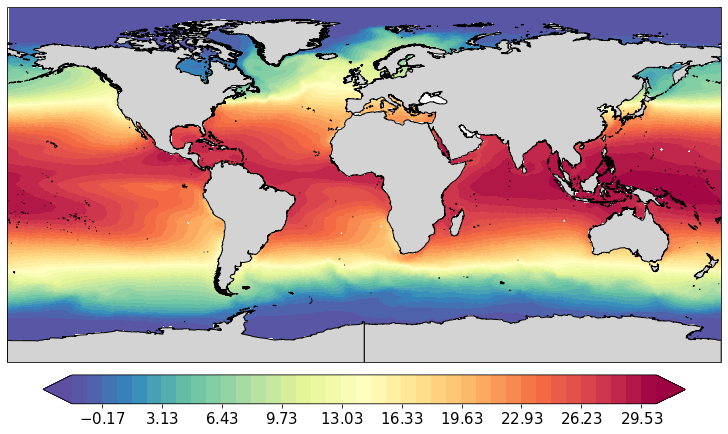

In [97]:
pf.plot(mesh, data_mean.temp[:,0].values)

[<GeoAxesSubplot:>]

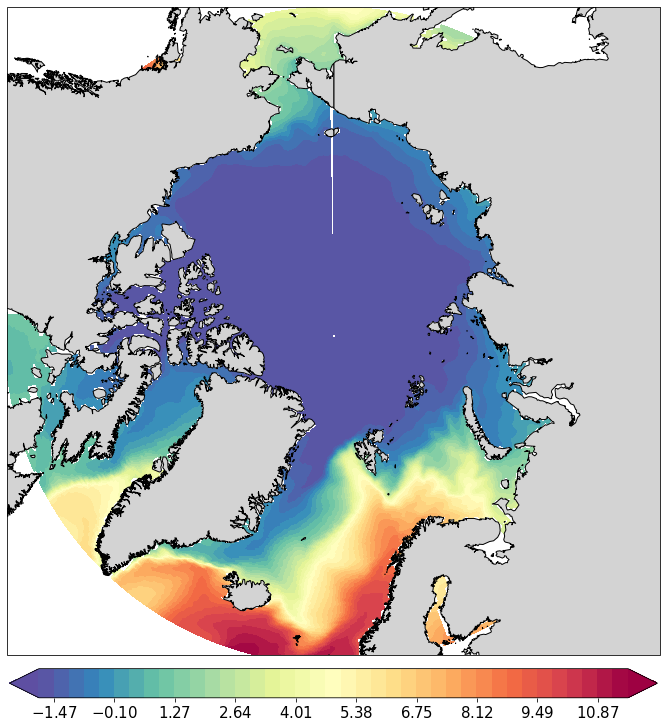

In [98]:
pf.plot(mesh, data_mean.temp[:,0].values, mapproj='np', box=[-180, 180, 60, 90])

In [99]:
data2_mean = data.sel(time=slice('2006','2010')).mean(dim='time').compute()

array([<GeoAxesSubplot:>, <GeoAxesSubplot:>], dtype=object)

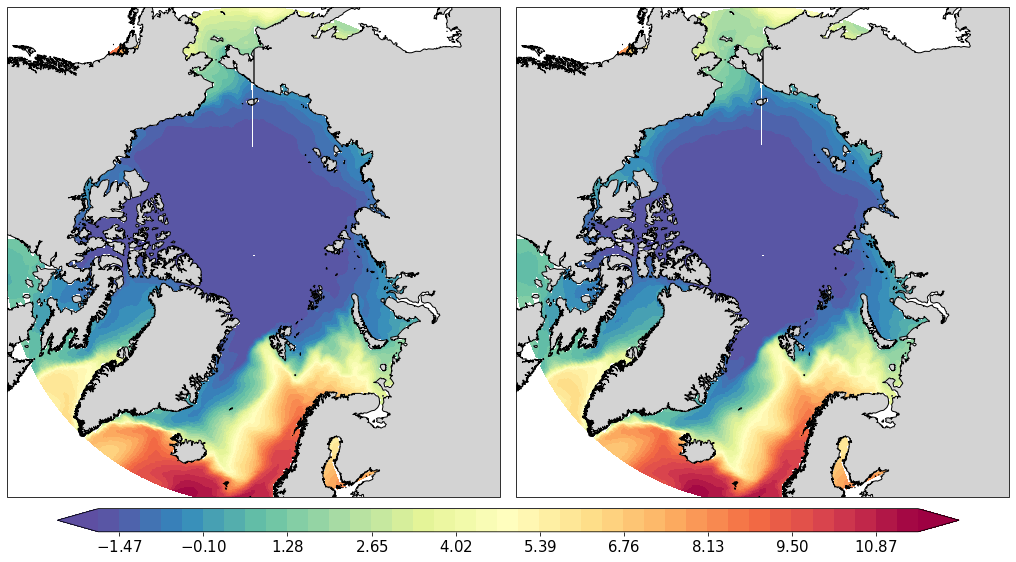

In [100]:
pf.plot(mesh, 
        [data_mean.temp[:,0].values, data2_mean.temp[:,0].values] ,
        mapproj='np',
        box=[-180, 180, 60, 90],
       rowscol=[1,2],
       figsize=(14,8))

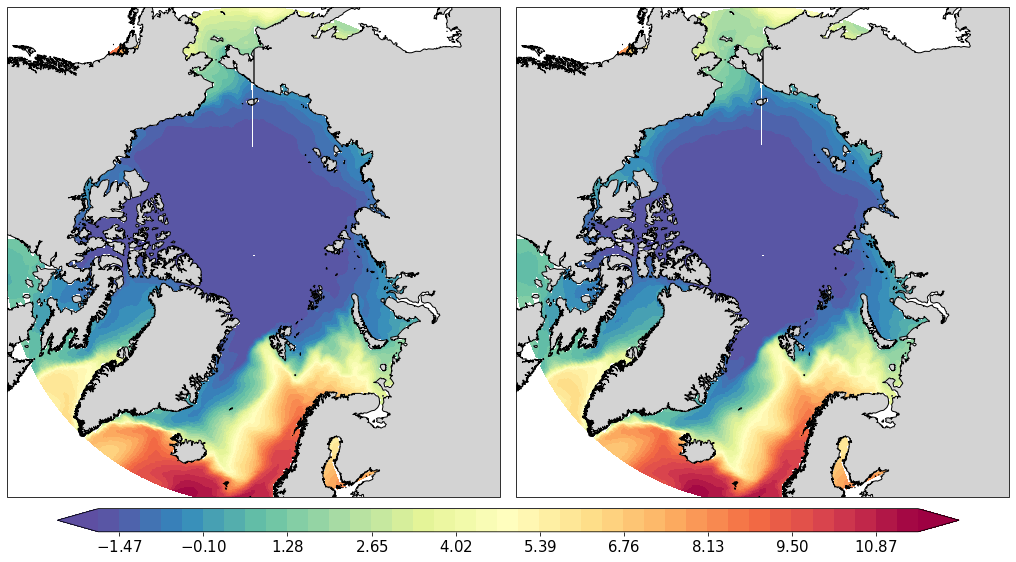

In [101]:
pf.plot(mesh, 
        [data_mean.temp[:,0].values, data2_mean.temp[:,0].values] ,
        mapproj='np',
        box=[-180, 180, 60, 90],
       rowscol=[1,2],
       figsize=(14,8))
plt.savefig('test.png')

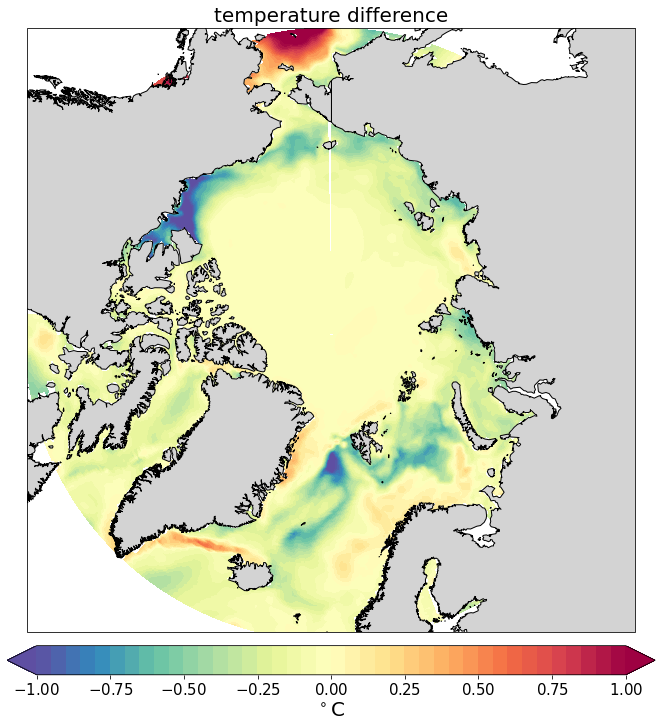

In [102]:
pf.plot(mesh, 
        data_mean.temp[:,0].values-data2_mean.temp[:,0].values ,
        mapproj='np',
        box=[-180, 180, 60, 90],
       rowscol=[1,1],
        levels=(-1,1,41),
        units=r'$^\circ$C',
        titles='temperature difference',
       figsize=(10,10))
plt.savefig('test.png')

## comparison to climatology

In [103]:
clim = xr.open_dataset('/work/ollie/nkolduno/meshes/POOL/climatology_PHC/farc/temp.fesom.1948.nc')

In [104]:
clim

<xarray.Dataset>
Dimensions:  (nod2: 638387, nz1: 47, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01
Dimensions without coordinates: nod2, nz1
Data variables:
    temp     (time, nod2, nz1) float32 ...

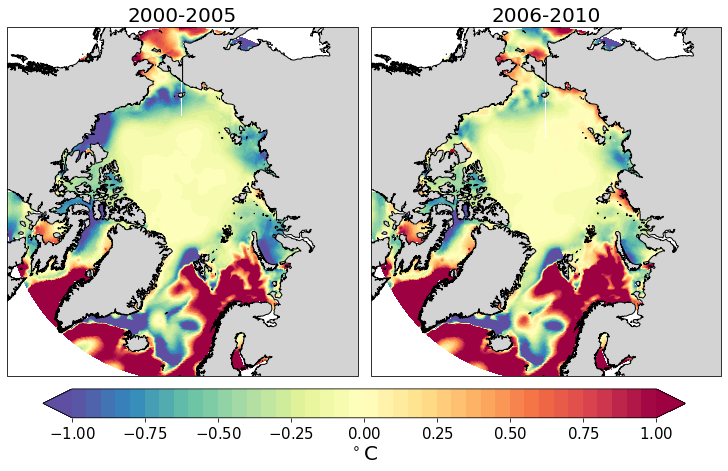

In [109]:
pf.plot(mesh, 
        [data_mean.temp[:,0].values-clim.temp[0,:,0].values,
         data2_mean.temp[:,0].values-clim.temp[0,:,0].values],
        mapproj='np',
        box=[-180, 180, 60, 90],
       rowscol=[1,2],
       levels=(-1,1,41),
        units=r'$^\circ$C',
        titles=['2000-2005','2006-2010'],
       figsize=(10,10))
plt.savefig('test.png')

In [110]:
mesh.zlev.shape

(48,)

In [111]:
mesh.zlev[18]

-340.0

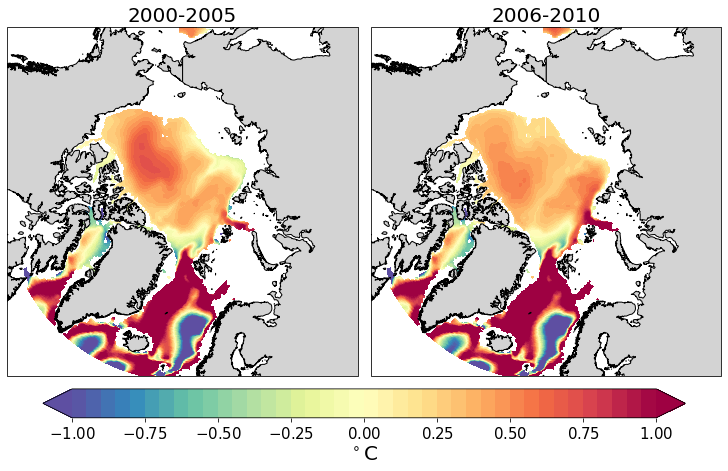

In [112]:
ind = 18
pf.plot(mesh, 
        [data_mean.temp[:,ind].values-clim.temp[0,:,ind].values,
         data2_mean.temp[:,ind].values-clim.temp[0,:,ind].values],
        mapproj='np',
        box=[-180, 180, 60, 90],
       rowscol=[1,2],
       levels=(-1,1,41),
        units=r'$^\circ$C',
        titles=['2000-2005','2006-2010'],
       figsize=(10,10))
plt.savefig('test.png')

## Transect

In [113]:
temp = data_mean.temp.values

In [114]:
temp

array([[-1.2213867, -1.2209324,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-1.194451 , -1.1925164, -1.1887287, ...,  0.       ,  0.       ,
         0.       ],
       [-1.1914889, -1.1888423, -1.1852356, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [-1.1181413, -1.1170442, -1.1154695, ...,  0.       ,  0.       ,
         0.       ],
       [-1.1571261, -1.1551356, -1.1523056, ...,  0.       ,  0.       ,
         0.       ],
       [-1.1675047, -1.1651841, -1.1621993, ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [115]:
lon_start = 120
lat_start = 75
lon_end = 120
lat_end = 80
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

<GeoAxesSubplot:>

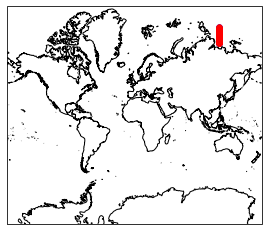

In [116]:
pf.plot_transect_map(lonlat, mesh, view='w')

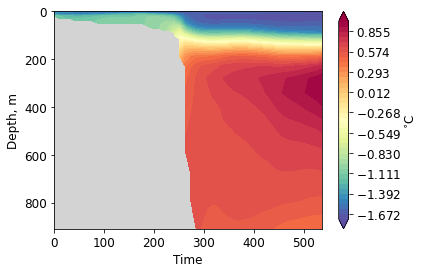

In [117]:
dist, transect_data = pf.get_transect(temp,
    mesh,
    lonlat)
pf.plot_xyz(mesh, transect_data, dist)

In [118]:
temp_clim = clim.temp[0,:,:]

In [119]:
bias = temp-temp_clim

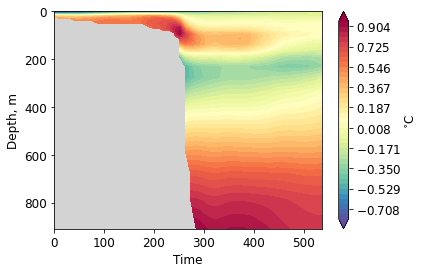

In [120]:
dist, transect_data = pf.get_transect(bias,
    mesh,
    lonlat)
pf.plot_xyz(mesh, transect_data, dist)

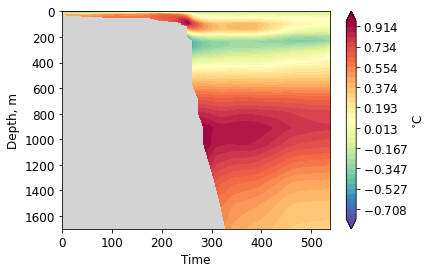

In [121]:
# dist, transect_data = pf.get_transect(temp,
#     mesh,
#     lonlat)
pf.plot_xyz(mesh, transect_data, dist, maxdepth=2000)

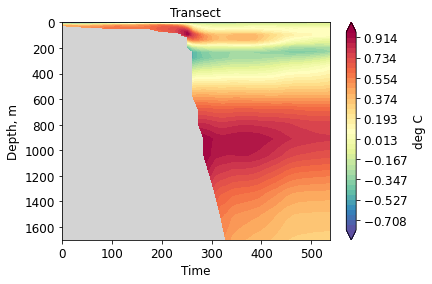

In [122]:
# dist, transect_data = pf.get_transect(temp,
#     mesh,
#     lonlat)
pf.plot_xyz(mesh, 
            transect_data,
            dist,
            maxdepth=2000,
            label="deg C",
            title="Transect")

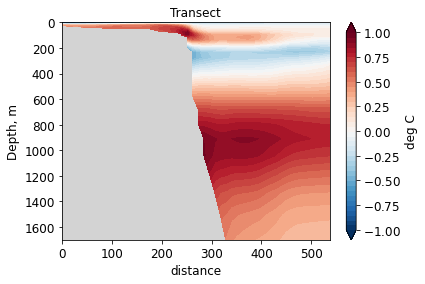

In [123]:
# dist, transect_data = pf.get_transect(temp,
#     mesh,
#     lonlat)
pf.plot_xyz(mesh, 
            transect_data,
            dist,
            maxdepth=2000,
            label="deg C",
            title="Transect",
            levels=np.linspace(-1,1, 41),
            cmap=cm.RdBu_r, 
            xlabel='distance'
           )

In [124]:
bias2 = data2_mean.temp.values-temp_clim

In [125]:
dist, transect_data2 = pf.get_transect(bias2,
    mesh,
    lonlat)

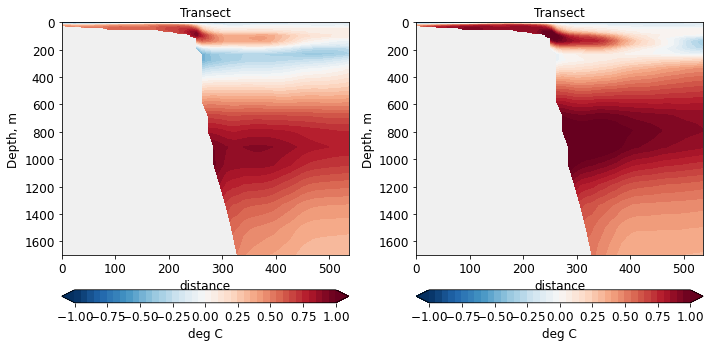

In [126]:
pf.plot_xyz(mesh, 
    [transect_data, transect_data2],
    dist,
    maxdepth=2000,
    label="deg C",
    title="Transect",
    levels=np.linspace(-1,1, 41),
    cmap=cm.RdBu_r,
    ncols=2,
    figsize=(10,5),
    facecolor='#f0f0f0',
    xlabel='distance'
)

## U/V transect

In [127]:
u = xr.open_mfdataset(os.path.join(datapath,"u.fesom.*.nc"))
v = xr.open_mfdataset(os.path.join(datapath,"v.fesom.*.nc"))

In [128]:
u

<xarray.Dataset>
Dimensions:  (elem: 1253306, nz1: 47, time: 62)
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time     (time) datetime64[ns] 1958-12-31T23:50:00 ... 2019-12-31T23:50:00
Dimensions without coordinates: elem
Data variables:
    u        (time, elem, nz1) float32 dask.array<chunksize=(1, 1253306, 47), meta=np.ndarray>
Attributes:
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       5d102e7
    FESOM_MeshPath:                      /work/ollie/clidyn/FESOM2/meshes/farc/
    FESOM_mesh_representative_checksum:  e11cc0f328d5381cfc6d9dbb94c5d6a4
    FESOM_ClimateDataPath:               /work/ollie/clidyn/FESOM2/hydrograph...
    FESOM_which_ALE:                     zstar
    FESOM_mix_scheme:                    cvmix_TKE+cvmix_IDEMIX
    FESOM_tra_adv_hor:                   MFCT
    FESOM_tra_adv_ver:                   QR4C
    FESOM_tra_adv_lim:                   FCT
    FESOM_use_partial_cell:              -1
    FESOM_force_rotation:                -1
    FESOM_include_fleapyear:             -1
    FESOM_use_floatice:                  0
    FESOM_whichEVP:                      0
    FESOM_evp_rheol_steps:               120
    FESOM_visc_option:                   7
    FESOM_w_split:                       -1

In [129]:
udata = u.u[0,:,:].values
vdata = v.v[0,:,:].values

In [131]:
udata.shape

(1253306, 47)

In [132]:
%%time
u_nodes = pf.tonodes3d(udata, mesh)
v_nodes = pf.tonodes3d(vdata, mesh)

In [133]:
lon_start = 120
lat_start = 75
lon_end = 120
lat_end = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

In [134]:
dist, rot_u, rot_v = pf.get_transect_uv(u_nodes, v_nodes, mesh, lonlat, myangle=0)

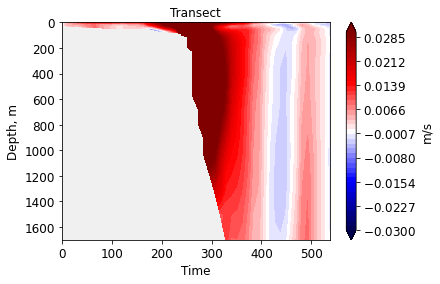

In [136]:
pf.plot_xyz(mesh, 
    rot_u,
    dist,
    maxdepth=2000,
    label="m/s",
    title="Transect",
    levels=np.round(np.linspace(-0.03, 0.03, 42),4),
    cmap=cm.seismic,
    ncols=2,
    figsize=(10,5),
    facecolor='#f0f0f0'
)

# Diagnostics

Collection of diagnostics to easily repeat OMIP2 exersizes.

In [137]:
import pyfesom2 as pf

In [138]:
mesh = pf.load_mesh('/work/ollie/clidyn/FESOM2/meshes/farc/')

/work/ollie/clidyn/FESOM2/meshes/farc/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/clidyn/FESOM2/meshes/farc/pickle_mesh_py3_fesom2


### Sum of the values

In [139]:
a_ice = xr.open_mfdataset(os.path.join(datapath,"a_ice.fesom.*.nc"))

In [141]:
a_ice = a_ice.sel(time=slice('2000','2010'))

In [142]:
a_ice

<xarray.Dataset>
Dimensions:  (nod2: 638387, time: 132)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-31T23:50:00 ... 2010-12-31T23:50:00
Dimensions without coordinates: nod2
Data variables:
    a_ice    (time, nod2) float32 dask.array<chunksize=(12, 638387), meta=np.ndarray>
Attributes:
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       5d102e7
    FESOM_MeshPath:                      /work/ollie/clidyn/FESOM2/meshes/farc/
    FESOM_mesh_representative_checksum:  e11cc0f328d5381cfc6d9dbb94c5d6a4
    FESOM_ClimateDataPath:               /work/ollie/clidyn/FESOM2/hydrograph...
    FESOM_which_ALE:                     zstar
    FESOM_mix_scheme:                    cvmix_TKE+cvmix_IDEMIX
    FESOM_tra_adv_hor:                   MFCT
    FESOM_tra_adv_ver:                   QR4C
    FESOM_tra_adv_lim:                   FCT
    FESOM_use_partial_cell:              -1
    FESOM_force_rotation:                -1
    FESOM_include_fleapyear:             -1
    FESOM_use_floatice:                  0
    FESOM_whichEVP:                      0
    FESOM_evp_rheol_steps:               120
    FESOM_visc_option:                   7
    FESOM_w_split:                       -1

In [178]:
ice_area = pf.ice_area(a_ice.a_ice, mesh,)

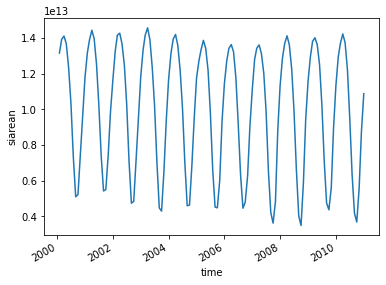

In [179]:
ice_area.plot()

[Implementation of pyfesom2 function](https://github.com/FESOM/pyfesom2/blob/c4a26c148a77cd06c8779ca983812c27dc55b7f3/pyfesom2/diagnostics.py#L135). It uses mesh.lamp2, which is used as weights.

In [180]:
mesh.lump2.shape

(638387,)

In [181]:
mesh.voltri.shape

(1253306,)

In [155]:
grid = xr.open_dataset('/work/ollie/clidyn/FESOM2/meshes/farc/fesom.mesh.diag.nc')

In [156]:
grid

<xarray.Dataset>
Dimensions:            (N: 9, edg_n: 1891970, elem_n: 1253306, n2: 2, n3: 3, n4: 4, nl: 48, nl1: 47, nod_n: 638387)
Dimensions without coordinates: N, edg_n, elem_n, n2, n3, n4, nl, nl1, nod_n
Data variables:
    zbar               (nl) float64 ...
    Z                  (nl1) float64 ...
    elem_area          (elem_n) float64 ...
    nlevels_nod2D      (nod_n) int32 ...
    nlevels            (elem_n) int32 ...
    nod_in_elem2D_num  (nod_n) int32 ...
    nod_part           (nod_n) int32 ...
    elem_part          (elem_n) int32 ...
    zbar_e_bottom      (elem_n) float64 ...
    zbar_n_bottom      (nod_n) float64 ...
    nod_area           (nl, nod_n) float64 ...
    elem               (n3, elem_n) int32 ...
    nodes              (n2, nod_n) float64 ...
    nod_in_elem2D      (N, nod_n) int32 ...
    edges              (n2, edg_n) int32 ...
    edge_tri           (n2, edg_n) int32 ...
    edge_cross_dxdy    (n4, edg_n) float64 ...
    gradient_sca_x     (n3, elem_n) float64 ...
    gradient_sca_y     (n3, elem_n) float64 ...

In [165]:
lon = np.rad2deg(grid.nodes[0,:].values)
lat = np.rad2deg(grid.nodes[1,:].values)

In [166]:
lon

array([140.1052, 140.5437, 140.987 , ..., 137.7703, 139.1579, 139.6963])

In [167]:
mesh.x2

array([140.1052, 140.5437, 140.987 , ..., 137.7703, 139.1579, 139.6963])

In [168]:
nod_area = grid.nod_area.values

In [170]:
nod_area.shape

(48, 638387)

In [172]:
ice_timestep = a_ice.a_ice[0,:]

In [173]:
ice_timestep

<xarray.DataArray 'a_ice' (nod2: 638387)>
dask.array<getitem, shape=(638387,), dtype=float32, chunksize=(638387,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2000-01-31T23:50:00
Dimensions without coordinates: nod2
Attributes:
    description:  ice concentration
    long_name:    ice concentration
    units:        %

In [174]:
hemis_mask = lat > 0

In [175]:
hemis_mask

array([False, False, False, ..., False, False, False])

In [176]:
hemis_mask.shape

(638387,)

In [182]:
ice_timestep.shape

(638387,)

In [183]:
ice_timestep[hemis_mask]

<xarray.DataArray 'a_ice' (nod2: 590786)>
dask.array<getitem, shape=(590786,), dtype=float32, chunksize=(590786,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2000-01-31T23:50:00
Dimensions without coordinates: nod2
Attributes:
    description:  ice concentration
    long_name:    ice concentration
    units:        %

In [187]:
nod_area[0,:]

array([1.18138091e+08, 1.80298344e+08, 1.91332761e+08, ...,
       2.07030813e+08, 2.44957619e+08, 3.10038454e+08])

In [191]:
area = (ice_timestep[hemis_mask] * nod_area[0,:][hemis_mask]).sum(axis=0)

In [193]:
area.values

array(1.31321053e+13)

In [194]:
ice_area[0]

<xarray.DataArray 'siarean' ()>
array(1.31536322e+13)
Coordinates:
    time     datetime64[ns] 2000-01-31T23:50:00

In [197]:
nod_area[0,:]

array([1.18138091e+08, 1.80298344e+08, 1.91332761e+08, ...,
       2.07030813e+08, 2.44957619e+08, 3.10038454e+08])

In [198]:
mesh.lump2

array([1.18089568e+08, 1.80317022e+08, 1.91342959e+08, ...,
       2.07116031e+08, 2.44994426e+08, 3.10263215e+08])

## Mean of the values

In [201]:
left = -90
right = -10
bottom = 0
top = 26

In [203]:
region = (lon < right) & (lon>left) & (lat > bottom) & (lat < top)

In [200]:
temp.shape

(638387, 47)

[<GeoAxesSubplot:>]

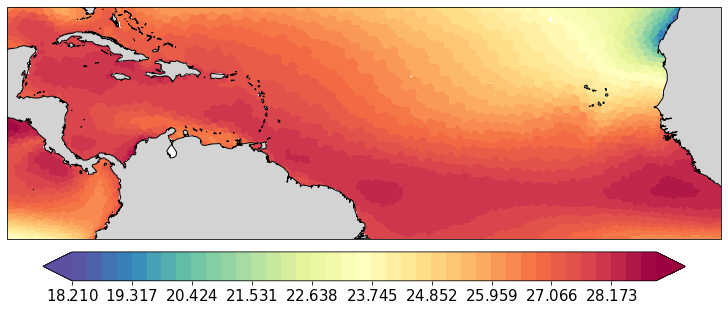

In [204]:
pf.plot(mesh, temp[:,0], box=[left, right, bottom, top])

In [206]:
(temp[:,0][region] * nod_area[0,:][region]).sum()/nod_area[0,:][region].sum()

26.726031606110116

Different depth

In [208]:
mesh.zlev[11]

-100.0

[<GeoAxesSubplot:>]

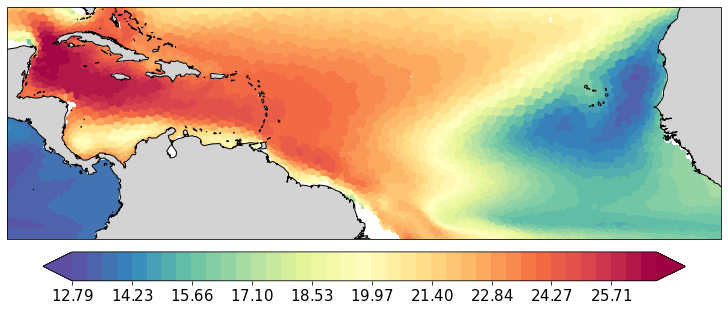

In [209]:
pf.plot(mesh, temp[:,11], box=[left, right, bottom, top])

In [210]:
(temp[:,11][region] * nod_area[11,:][region]).sum()/nod_area[11,:][region].sum()

19.750851558267676

## Vertical profile

In [211]:
temp.shape

(638387, 47)

In [212]:
pf.hovm_data(temp, mesh)

<xarray.DataArray 'nod_area' (nz1: 47, nod2: 638387)>
[30004189 values with dtype=float64]
Dimensions without coordinates: nz1, nod2
Attributes:
    long_name:  nodal areas


/home/ollie/nkolduno/PYTHON/pyfesom2/pyfesom2/diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  hdg_variable = hdg_total / (nod_area.T).sum(axis=0).data


array([[18.47737163, 18.38781046, 18.22597381, 17.931705  , 17.64101353,
        17.24552857, 16.79015276, 16.37417995, 15.96701723, 15.56263309,
        15.16570064, 14.6776932 , 14.01158304, 13.21426828, 12.38341328,
        11.54754183, 10.66945825,  9.77605003,  8.87866296,  7.96538877,
         7.05861716,  6.20646916,  5.43745207,  4.76462304,  4.20038138,
         3.73124647,  3.33406807,  2.99490814,  2.68837664,  2.40518229,
         2.16362864,  1.95254864,  1.7677389 ,  1.61001563,  1.48107936,
         1.36847778,  1.26662109,  1.1739058 ,  1.08634298,  1.00840738,
         0.95468032,  0.92021463,  0.90683517,  0.95406404,  1.01870993,
         1.03277235,         nan]])

In [213]:
profile = []
for i in range(temp.shape[1]):
    a = (temp[:,i] * nod_area[i,:]).sum()/nod_area[i,:].sum()
    profile.append(a)

<ipython-input-213-cd8e36bf5cb5>:3: RuntimeWarning: invalid value encountered in double_scalars
  a = (temp[:,i] * nod_area[i,:]).sum()/nod_area[i,:].sum()


In [214]:
profile

[18.477371630977434,
 18.387810461115823,
 18.225973806599157,
 17.93170500435617,
 17.641013526886958,
 17.245528569952675,
 16.79015275878394,
 16.374179951911184,
 15.967017231005332,
 15.562633089048923,
 15.165700644495084,
 14.677693198775312,
 14.011583038185227,
 13.214268282982216,
 12.38341328455185,
 11.54754182869314,
 10.669458251104892,
 9.776050028032552,
 8.878662961058371,
 7.9653887682381965,
 7.058617160359234,
 6.206469162392334,
 5.4374520662792065,
 4.764623042814511,
 4.200381378032805,
 3.73124647355747,
 3.3340680658994497,
 2.994908142040195,
 2.688376640874015,
 2.4051822911137752,
 2.1636286398924636,
 1.9525486446277738,
 1.7677389001286377,
 1.6100156266133692,
 1.481079357258196,
 1.3684777815638216,
 1.2666210946918157,
 1.1739057957963366,
 1.0863429751261915,
 1.0084073770707815,
 0.9546803240633738,
 0.9202146328168487,
 0.9068351672472132,
 0.9540640365937225,
 1.018709931218646,
 1.0327723458232594,
 nan]